In [1]:
## Imports
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Helper Functions
# Converts rgb image to grayscale
def rgb2gray(img):
    return np.mean(img, axis=-1)

# Returns the x y coordinates of the max value of a matrix
def argmax_xy(img):
    return np.flip(np.unravel_index(np.argmax(img), img.shape))

# Constructs a image mask of a certain size centered around a specific location
def get_mask(img, center, size=100): 
    mask = np.zeros(img.shape)
    box_x_low = center[1] - size
    box_x_high = center[1] + size
    box_y_low = center[0] - size
    box_y_high = center[0] + size

    box_x_low = 0 if box_x_low < 0 else box_x_low
    box_x_high = mask.shape[1] if box_x_high > mask.shape[1] else box_x_high
    box_y_low = 0 if box_y_low < 0 else box_y_low
    box_y_high = mask.shape[0] if box_y_high > mask.shape[0] else box_y_high

    mask[box_x_low:box_x_high, box_y_low:box_y_high] = 1
    return mask

# Constructs the position vector from camera data
def get_pos(cam, initial_pos, debug_frame=-1):
    pos = np.zeros((2, cam.shape[-1]), dtype=int)
    prev_pos = initial_pos
    for i in range(cam.shape[-1]):
        img = cam[:,:,:,i]
        gray = rgb2gray(img)
        
        mask = get_mask(gray, prev_pos)

        pos[:, i] = argmax_xy(gray * mask)

        if debug_frame != -1 and i == debug_frame:
            plt.plot(pos[0, i], pos[1, i], 'bx') # Current Pos
            plt.plot(pos[0, i - 1], pos[1, i - 1], 'ro') # Previous Pos, also center of filter
            plt.imshow(gray * mask, cmap='gray')
            plt.show()

        prev_pos = pos[:, i]

    return pos

## Part 1

In [3]:
cam1_1 = loadmat('cam1_1.mat')['vidFrames1_1'] / 255
cam2_1 = loadmat('cam2_1.mat')['vidFrames2_1'] / 255
cam3_1 = loadmat('cam3_1.mat')['vidFrames3_1'] / 255

In [4]:
pos1 = get_pos(cam1_1, (325, 225))
pos2 = get_pos(cam2_1, (275, 250))
pos3 = get_pos(cam3_1, (325, 325))

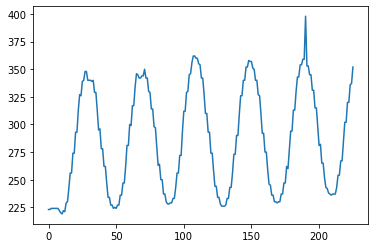

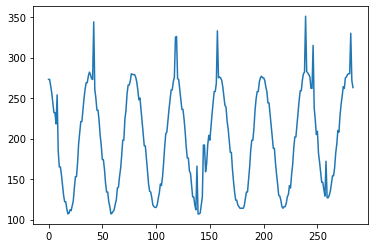

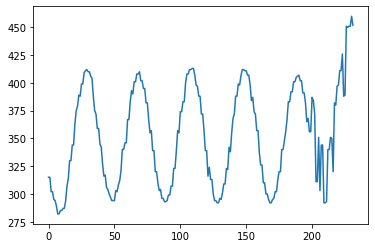

In [7]:
plt.plot(np.arange(pos1.shape[1]), pos1[1,:])
plt.show()
plt.plot(np.arange(pos2.shape[1]), pos2[1,:])
plt.show()
plt.plot(np.arange(pos3.shape[1]), pos3[0,:])
plt.show()

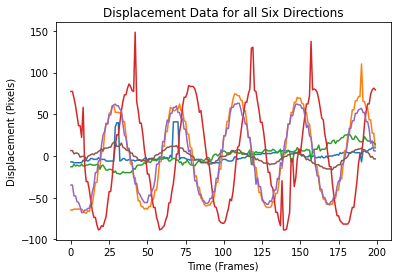

In [5]:
# Find bottom of oscillation to align videos
v1_start = np.argmin(pos1[1, 0:25])
v2_start = np.argmin(pos2[1, 0:40])
v3_start = np.argmin(pos3[0, 0:25]) # Cam 3 has x-y axes flipped, vertical motion on x axis

# Change the start of each to align
pos_mat = np.vstack((pos1[:, v1_start:v1_start + 200], pos2[:, v2_start:v2_start + 200], pos3[:, v3_start:v3_start + 200]))
pos_mat = (pos_mat - np.mean(pos_mat, axis=1)[:, None])

# Visually check approximate alignment
for i in range(pos_mat.shape[0]):
    plt.plot(np.arange(pos_mat[i, :].shape[0]), pos_mat[i, :])
plt.title("Displacement Data for all Six Directions")
plt.xlabel("Time (Frames)")
plt.ylabel("Displacement (Pixels)")
plt.show()

[0.92939335 0.0283274  0.02327067 0.00930478 0.0087088  0.00099501]


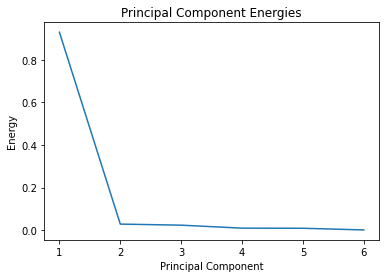

In [37]:
U, S, V = np.linalg.svd(pos_mat / np.sqrt(pos_mat.shape[1] - 1))
S_energy = S**2 / np.sum(S**2)
print(S_energy)
plt.plot(np.arange(1, 7), S_energy)
plt.title("Principal Component Energies")
plt.xlabel("Principal Component")
plt.ylabel("Energy")
plt.show()

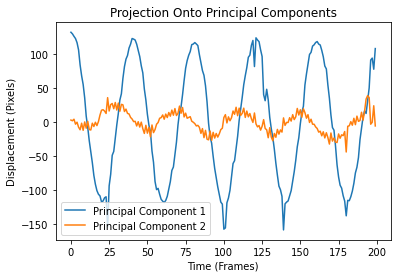

In [36]:
# Project Data onto our PC Basis
Y = U.T @ pos_mat
plt.plot(Y[0, :])
plt.plot(Y[1, :])
plt.title("Projection Onto Principal Components")
plt.xlabel("Time (Frames)")
plt.ylabel("Displacement (Pixels)")
plt.legend(("Principal Component 1", "Principal Component 2"))
plt.show()

## Part 2

In [39]:
cam1_1 = None
cam2_1 = None
cam3_1 = None

cam1_2 = loadmat('cam1_2.mat')['vidFrames1_2']
cam2_2 = loadmat('cam2_2.mat')['vidFrames2_2']
cam3_2 = loadmat('cam3_2.mat')['vidFrames3_2']

In [40]:
pos1 = get_pos(cam1_2, (325, 300))
pos2 = get_pos(cam2_2, (300, 350))
pos3 = get_pos(cam3_2, (350, 250))

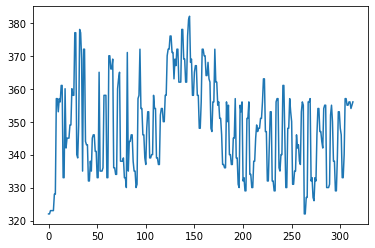

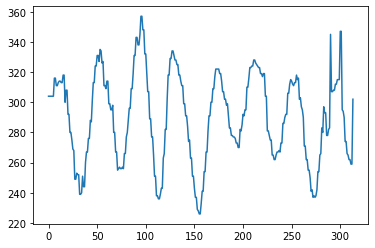

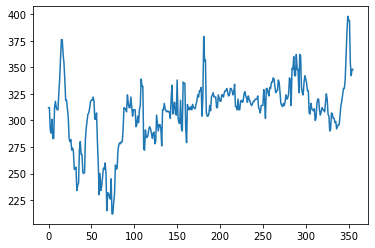

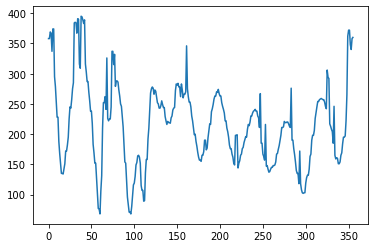

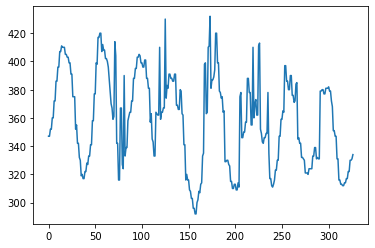

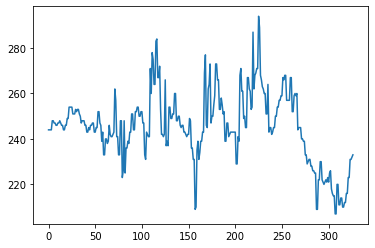

In [41]:
plt.plot(pos1[0, :])
plt.show()
plt.plot(pos1[1, :])
plt.show()
plt.plot(pos2[0, :])
plt.show()
plt.plot(pos2[1, :])
plt.show()
plt.plot(pos3[0, :])
plt.show()
plt.plot(pos3[1, :])
plt.show()

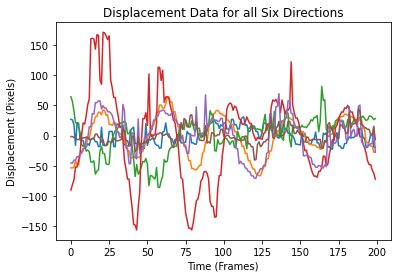

In [42]:
v1_start = np.argmin(pos1[1, 0:50])
v2_start = np.argmin(pos2[1, 0:30])
v3_start = np.argmin(pos3[0, 0:50]) # Cam 3 has x-y axes flipped, vertical motion on x axis
# Use these to align the videos
pos_mat = np.vstack((pos1[:, v1_start:v1_start + 200], pos2[:, v2_start:v2_start + 200], pos3[:, v3_start:v3_start + 200]))
pos_mat = (pos_mat - np.mean(pos_mat, axis=1)[:, None])

# Visually check approximate alignment
for i in range(pos_mat.shape[0]):
    plt.plot(np.arange(pos_mat[i, :].shape[0]), pos_mat[i, :])

plt.title("Displacement Data for all Six Directions")
plt.xlabel("Time (Frames)")
plt.ylabel("Displacement (Pixels)")
plt.show()

[0.69712315 0.14770444 0.08827579 0.03468003 0.02222257 0.00999401]


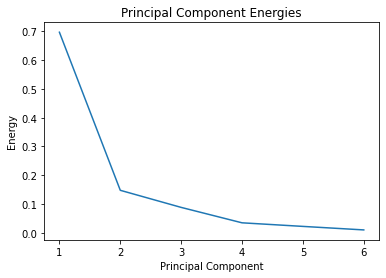

In [43]:
U, S, V = np.linalg.svd(pos_mat / np.sqrt(pos_mat.shape[1] - 1))
S_energy = S**2 / np.sum(S**2)
print(S_energy)
plt.plot(np.arange(1, 7), S_energy)
plt.title("Principal Component Energies")
plt.xlabel("Principal Component")
plt.ylabel("Energy")
plt.show()

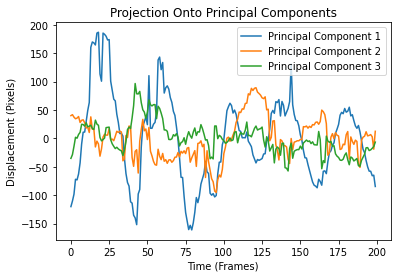

In [57]:
# Project Data onto our PC Basis
Y = U.T @ pos_mat
plt.plot(Y[0, :])
plt.plot(Y[1, :])
plt.plot(Y[2, :])

plt.title("Projection Onto Principal Components")
plt.xlabel("Time (Frames)")
plt.ylabel("Displacement (Pixels)")
plt.legend(("Principal Component 1", "Principal Component 2", "Principal Component 3"))
plt.show()

## Part 3

In [58]:
cam1_2 = None
cam2_2 = None
cam3_2 = None

cam1_3 = loadmat('cam1_3.mat')['vidFrames1_3']
cam2_3 = loadmat('cam2_3.mat')['vidFrames2_3']
cam3_3 = loadmat('cam3_3.mat')['vidFrames3_3']

In [59]:
pos1 = get_pos(cam1_3, (325, 300))
pos2 = get_pos(cam2_3, (300, 350))
pos3 = get_pos(cam3_3, (350, 250))

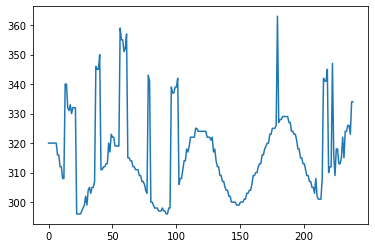

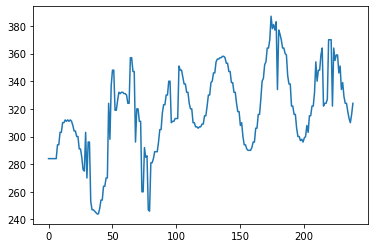

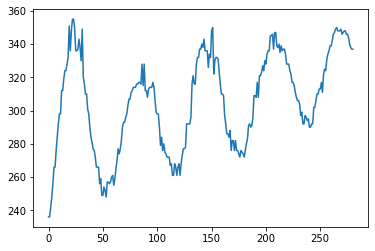

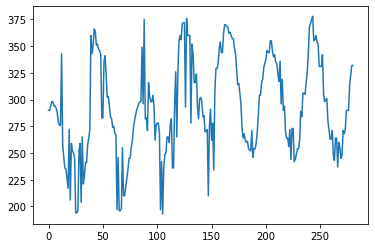

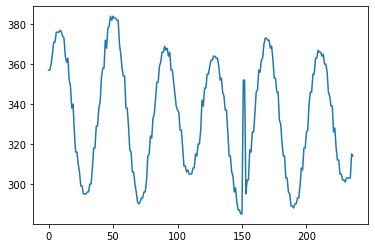

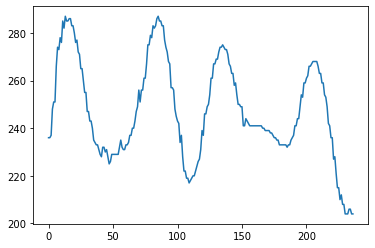

In [60]:
plt.plot(pos1[0, :])
plt.show()
plt.plot(pos1[1, :])
plt.show()
plt.plot(pos2[0, :])
plt.show()
plt.plot(pos2[1, :])
plt.show()
plt.plot(pos3[0, :])
plt.show()
plt.plot(pos3[1, :])
plt.show()

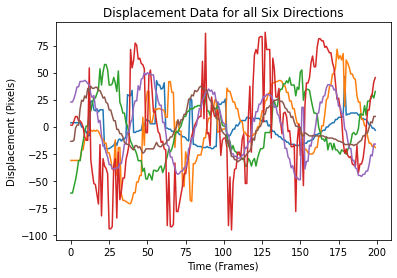

In [61]:
v1_start = 0#np.argmin(pos1[1, 0:50])
v2_start = 0#np.argmin(pos2[1, 0:30])
v3_start = 0#np.argmin(pos3[0, 0:50]) # Cam 3 has x-y axes flipped, vertical motion on x axis
# Use these to align the videos
pos_mat = np.vstack((pos1[:, v1_start:v1_start + 200], pos2[:, v2_start:v2_start + 200], pos3[:, v3_start:v3_start + 200]))
pos_mat = (pos_mat - np.mean(pos_mat, axis=1)[:, None])

# Visually check approximate alignment
for i in range(pos_mat.shape[0]):
    plt.plot(np.arange(pos_mat[i, :].shape[0]), pos_mat[i, :])
plt.title("Displacement Data for all Six Directions")
plt.xlabel("Time (Frames)")
plt.ylabel("Displacement (Pixels)")
plt.show()

[0.48688444 0.21759215 0.15600145 0.09784659 0.02768546 0.01398992]


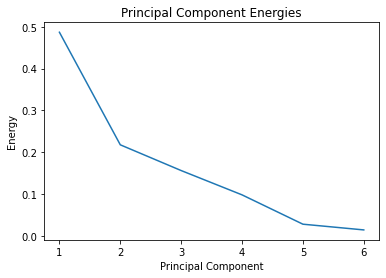

In [62]:
U, S, V = np.linalg.svd(pos_mat / np.sqrt(pos_mat.shape[1] - 1))
S_energy = S**2 / np.sum(S**2)
print(S_energy)
plt.plot(np.arange(1, 7), S_energy)
plt.title("Principal Component Energies")
plt.xlabel("Principal Component")
plt.ylabel("Energy")
plt.show()

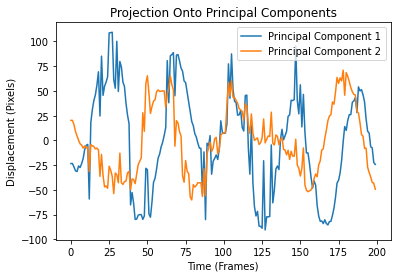

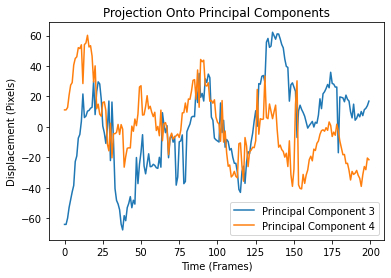

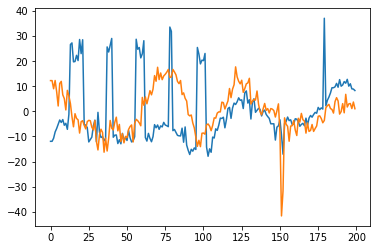

In [71]:
# Project Data onto our PC Basis
Y = U.T @ pos_mat
plt.plot(Y[0, :])
plt.plot(Y[1, :])

plt.title("Projection Onto Principal Components")
plt.xlabel("Time (Frames)")
plt.ylabel("Displacement (Pixels)")
plt.legend(("Principal Component 1", "Principal Component 2"))
plt.show()

plt.plot(Y[2, :])
plt.plot(Y[3, :])
plt.title("Projection Onto Principal Components")
plt.xlabel("Time (Frames)")
plt.ylabel("Displacement (Pixels)")
plt.legend(("Principal Component 3", "Principal Component 4"))
plt.show()


## Part 4

In [72]:
cam1_3 = None
cam2_3 = None
cam3_3 = None

cam1_4 = loadmat('cam1_4.mat')['vidFrames1_4']
cam2_4 = loadmat('cam2_4.mat')['vidFrames2_4']
cam3_4 = loadmat('cam3_4.mat')['vidFrames3_4']

In [73]:
pos1 = get_pos(cam1_4, (400, 325))
pos2 = get_pos(cam2_4, (250, 250))
pos3 = get_pos(cam3_4, (350, 250))

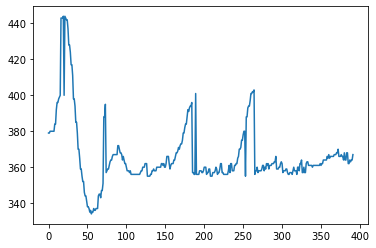

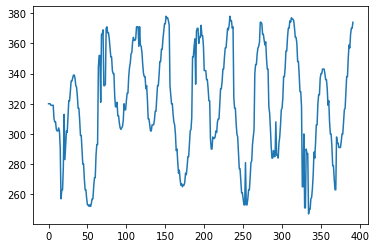

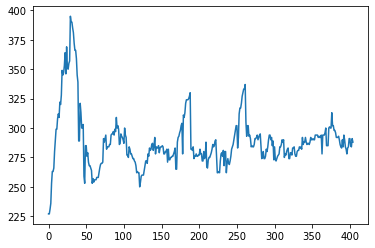

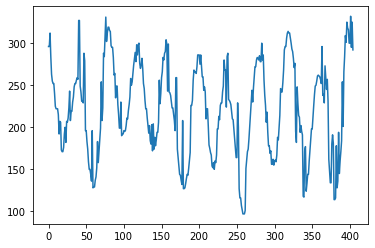

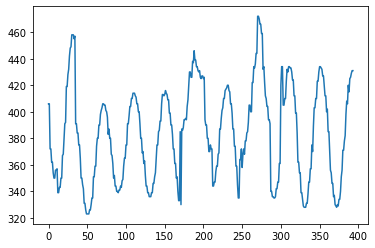

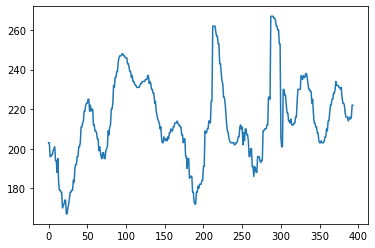

In [74]:
plt.plot(pos1[0, :])
plt.show()
plt.plot(pos1[1, :])
plt.show()
plt.plot(pos2[0, :])
plt.show()
plt.plot(pos2[1, :])
plt.show()
plt.plot(pos3[0, :])
plt.show()
plt.plot(pos3[1, :])
plt.show()

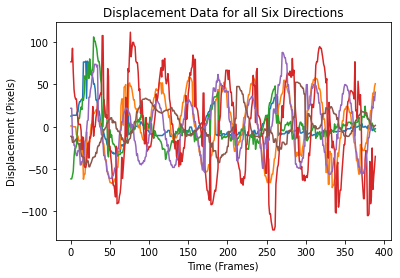

In [75]:
v1_start = 0#np.argmin(pos1[1, 0:50])
v2_start = 0#np.argmin(pos2[1, 0:30])
v3_start = 0#np.argmin(pos3[0, 0:50]) # Cam 3 has x-y axes flipped, vertical motion on x axis
# Use these to align the videos
pos_mat = np.vstack((pos1[:, v1_start:v1_start + 390], pos2[:, v2_start:v2_start + 390], pos3[:, v3_start:v3_start + 390]))
pos_mat = (pos_mat - np.mean(pos_mat, axis=1)[:, None])

# Visually check approximate alignment
for i in range(pos_mat.shape[0]):
    plt.plot(np.arange(pos_mat[i, :].shape[0]), pos_mat[i, :])
plt.title("Displacement Data for all Six Directions")
plt.xlabel("Time (Frames)")
plt.ylabel("Displacement (Pixels)")
plt.show()

[0.5204716  0.26783898 0.12839907 0.04407938 0.02300905 0.01620192]


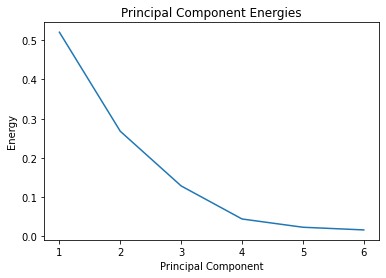

In [76]:
U, S, V = np.linalg.svd(pos_mat / np.sqrt(pos_mat.shape[1] - 1))
S_energy = S**2 / np.sum(S**2)
print(S_energy)
plt.plot(np.arange(1, 7), S_energy)
plt.title("Principal Component Energies")
plt.xlabel("Principal Component")
plt.ylabel("Energy")
plt.show()

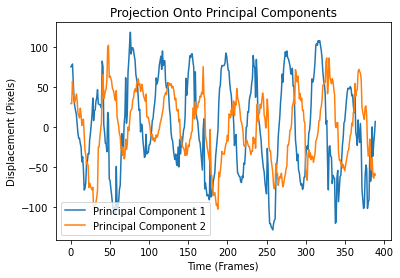

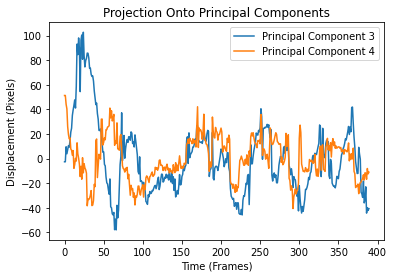

In [78]:
# Project Data onto our PC Basis
Y = U.T @ pos_mat
plt.plot(Y[0, :])
plt.plot(Y[1, :])

plt.title("Projection Onto Principal Components")
plt.xlabel("Time (Frames)")
plt.ylabel("Displacement (Pixels)")
plt.legend(("Principal Component 1", "Principal Component 2"))
plt.show()

plt.plot(Y[2, :])
plt.plot(Y[3, :])
plt.title("Projection Onto Principal Components")
plt.xlabel("Time (Frames)")
plt.ylabel("Displacement (Pixels)")
plt.legend(("Principal Component 3", "Principal Component 4"))
plt.show()